In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
# pyplot.style.use('dark_background')

In [3]:
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.datasets import cifar10
from keras.utils import normalize
from tensorflow.keras import datasets, layers, models

**LOAD THE IMAGE AND PREPROCESS THE DATA**

In [4]:
# loading the ciphar10 images and labels into test and training sets 

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [6]:
# looking at the shape of our training and testing set
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [7]:
# X = numpy array of the images both test and training images, 
# y = numpy 2D array of the labels both testing and training labels 
# the shape of X and y reveals
# the sample data contains 50000 training images across 5000 labels 
# and 10000 test images across 10000 lables

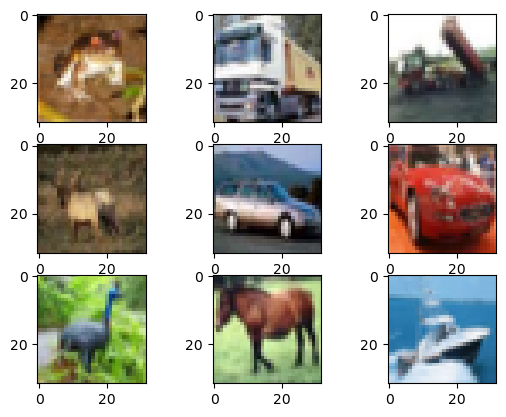

In [8]:
# display a few of the images 
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i])

In [9]:
# plt.show()

In [10]:
# show the training labels
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [9]:
# since y_train is a numpy 2D array of the labels, we need to convert it into a 1D for our classification
y_train = y_train.reshape(-1,)

In [10]:
# display the first 7 elements in our training labels 
y_train[:7]

array([6, 9, 9, 4, 1, 1, 2], dtype=uint8)

In [11]:
# we also covert y_test to a 1D array so that it will workk well with our classification
y_test = y_test.reshape(-1,)

In [14]:
# display the first 7 elements in our testing labels 
y_test[:7]

array([3, 8, 8, 0, 6, 6, 1], dtype=uint8)

**Normalizing the training data**

In [15]:
# We need to Normalize the images to a number from 0 to 1. 
# Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. 
# Hence to normalize in 0-->1 range, we need to divide it by 255

In [16]:
# let's look at the numpy array that represents the pixel values of each image
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [15]:
# normalize the image data
#X_train = normalize(X_train, axis=1)
#X_train[0] / 255

In [17]:
# X_train[0] is all the data relating to airplane
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [18]:
# X_test = normalize(X_test, axis=1)
# let's normalize the test and training data for the images 

In [12]:
# let's normalize X_train and X_test. Remember that the numpy array values is supposed to be between 0 and 1 
# after it has been normalized 
X_train = X_train / 255

In [13]:
X_test = X_test / 255

In [14]:
#let's take a look at X_train
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [15]:
# let's take a look at X_train
X_test

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [23]:
# Split the data into training and validation sets
# split = 5000
# X_train, X_val = X_train[split:], X_train[:split]
# y_train, y_val = y_train[split:], y_train[:split]


In [25]:
# len(X_val)

**Building simple artificial neural network for image classification**

In [23]:
# define our classes names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(class_names)

In [24]:
# Define the model
# model = Sequential()

**TRAINING OUR DATASET**

In [25]:
#let's train our dataset
# we will first use an artificial neural network to train our model. In this situation, 
# we are only adding the fully connected layers and excluding the convolutional layers
# Train the model
ann_model = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        #first layer has 3000 neurons
        layers.Dense(3000, activation='relu'),
        # second layer has 1000 nuerons
        layers.Dense(1000, activation='relu'),
        # the third layer handles the 10 categories
        layers.Dense(10, activation='softmax')    
    ])

Metal device set to: Apple M1


2023-02-21 14:56:00.742873: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-21 14:56:00.744533: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [26]:
# Compile the model
ann_model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
ann_model.fit(X_train, y_train, epochs=5)

Epoch 1/5


2023-02-21 14:56:12.631051: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-21 14:56:12.830210: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 19s 12ms/step - loss: 1.8138 - accuracy: 0.3532
Epoch 2/5
1563/1563 [==============================] - 18s 12ms/step - loss: 1.6252 - accuracy: 0.4275
Epoch 3/5
1563/1563 [==============================] - 19s 12ms/step - loss: 1.5450 - accuracy: 0.4572
Epoch 4/5
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4828 - accuracy: 0.4797
Epoch 5/5
1563/1563 [==============================] - 18s 12ms/step - loss: 1.4323 - accuracy: 0.4953


In [28]:
# let's summarize our model
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


In [29]:
#Let's build convulated neural network for our dataset
# we will be making use of the relu activation function and specifying 
# the image shape as 32 by 32 under 3 channels

In [16]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

Metal device set to: Apple M1


2023-03-02 13:39:47.493398: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-02 13:39:47.499806: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [17]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
hist = cnn.fit(X_train, y_train, epochs=10)

2023-03-02 13:40:06.552100: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/10
   1/1563 [..............................] - ETA: 10:14 - loss: 2.3128 - accuracy: 0.1250

2023-03-02 13:40:07.042561: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 16s 10ms/step - loss: 1.4600 - accuracy: 0.4747
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0907 - accuracy: 0.6190
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9606 - accuracy: 0.6639
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8719 - accuracy: 0.6966
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8045 - accuracy: 0.7199
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7411 - accuracy: 0.7441
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6978 - accuracy: 0.7560
Epoch 8/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6471 - accuracy: 0.7754
Epoch 9/10
1563/1563 [==============================] - 16s 11ms/step - loss: 0.6115 - accuracy: 0.7855
Epoch 10/10
1563/1563 [==============================] - 17s 11ms/step - lo

In [ ]:
# after 5 epochs we attained 65% accuracy and after 10 epochs we attained an accuracy of 88% this shows that CNNs
# yield more accurate results than ANNs

In [33]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_3 (Dense)             (None, 64)               

In [ ]:
# PLOT THE ACCURACY AND THE LOSS FUNCTION ON A GRAPH

In [19]:
hist.history

{'loss': [1.4599547386169434,
  1.0906726121902466,
  0.9605808258056641,
  0.8718655109405518,
  0.8045493364334106,
  0.74107426404953,
  0.6977901458740234,
  0.6470806002616882,
  0.6115426421165466,
  0.5711923241615295],
 'accuracy': [0.4746800363063812,
  0.6189600229263306,
  0.663860023021698,
  0.6965600252151489,
  0.7199000716209412,
  0.7440800666809082,
  0.7560400366783142,
  0.7754000425338745,
  0.7854800224304199,
  0.801080048084259]}

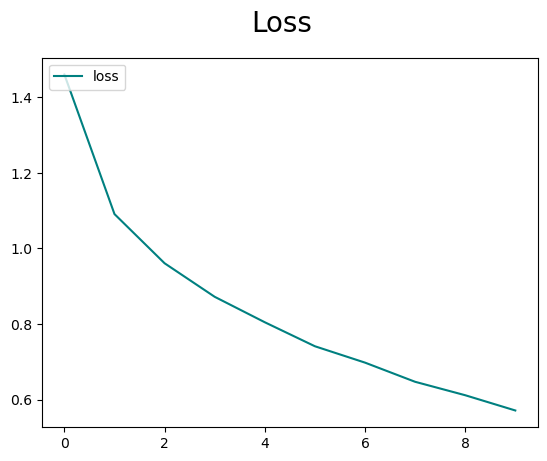

In [20]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
# plt.plot(hist.history['accuracy'], color='orange', label='accuracy')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
# We can see that our loss is reducing and our model accuracy is increasing is good. This means there is very little
# overfitting and our model has a high chance of making accurate predictions. 

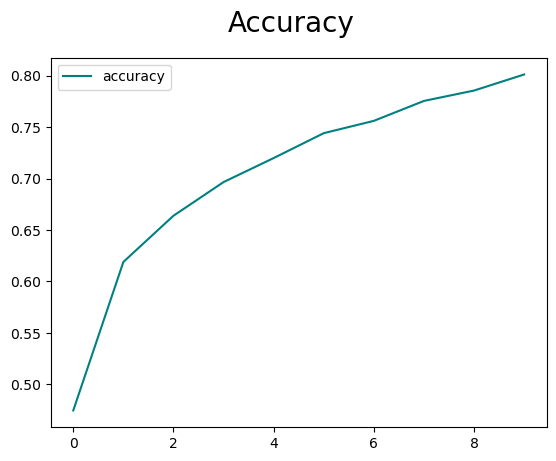

In [21]:
# let's plot the accuracy on a graph
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
#plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [22]:
cnn.evaluate(X_test,y_test)

 16/313 [>.............................] - ETA: 2s - loss: 0.9331 - accuracy: 0.7012

2023-03-02 13:44:12.043184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 0.9148 - accuracy: 0.7042


[0.914799153804779, 0.704200029373169]

In [203]:
y_pred = cnn.predict(X_test)
y_pred[:5]

 47/313 [===>..........................] - ETA: 0s

2023-02-20 20:42:09.108334: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step


array([[1.5222464e-02, 5.2572228e-04, 2.0009862e-02, 6.7290896e-01,
        9.7769089e-03, 1.4841111e-01, 4.2941865e-02, 5.5894190e-03,
        8.0261998e-02, 4.3516536e-03],
       [7.1646407e-02, 3.5371771e-01, 1.3594514e-04, 5.7339541e-05,
        1.4579763e-04, 6.9213843e-06, 2.2199851e-05, 1.1265351e-05,
        5.5991930e-01, 1.4337219e-02],
       [2.2750908e-01, 1.2097461e-01, 7.1009400e-04, 1.1224485e-03,
        1.0896340e-03, 3.9041133e-04, 1.2942229e-04, 3.1336276e-03,
        6.0496223e-01, 3.9978527e-02],
       [6.7416239e-01, 1.2558989e-01, 1.3204795e-02, 3.1615919e-03,
        9.7995186e-03, 3.5719326e-04, 7.2387238e-03, 1.0806440e-03,
        1.6133890e-01, 4.0663858e-03],
       [4.2518532e-06, 3.2911605e-05, 6.7074508e-03, 4.0656053e-02,
        4.6114486e-02, 5.6916559e-03, 8.9969516e-01, 4.0882346e-06,
        1.0923286e-03, 1.6658236e-06]], dtype=float32)

In [83]:
y_classes = [np.argmax(element) for element in y_pred]
#len(y_classes)
y_classes[:5]


[3, 8, 1, 0, 4]

In [43]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(class_names[y[index]])


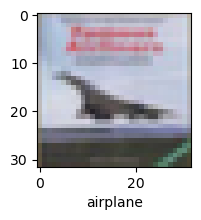

In [44]:
plot_sample(X_test, y_test,3)

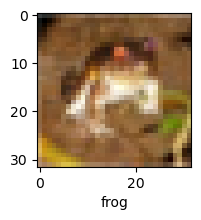

In [45]:
plot_sample(X_train, y_train, 0)

In [46]:
# use the predict function to get the predicted class probabilities 
y_pred = cnn.predict(X_test)

  7/313 [..............................] - ETA: 2s  

2023-02-21 00:13:15.813462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 4ms/step


In [51]:
y_pred[:1]

array([[4.3765800e-03, 4.3915058e-03, 7.0829305e-04, 8.2506281e-01,
        2.7236048e-04, 4.3177772e-02, 2.8969929e-02, 1.3881602e-04,
        9.2851914e-02, 5.0060349e-05]], dtype=float32)

**TESTING OUR CLASSIFIER WITH A SAMPLE IMAGE**

In [ ]:
#load the image 

In [7]:
from PIL import Image
import numpy as np 
import cv2
import tensorflow as tf

In [14]:
img = cv2.imread('/Users/alexanderirabor/Downloads/MachineLearning/ImageClassifier/test/ai_images.jpg')

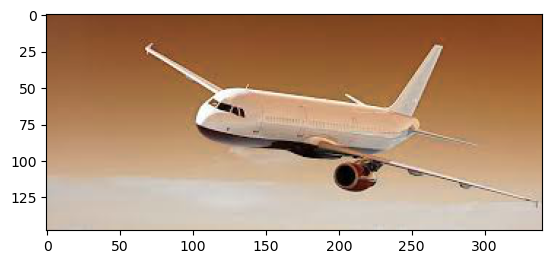

In [15]:
#let's view our random image before resizing it
plt.imshow(img)
plt.show()

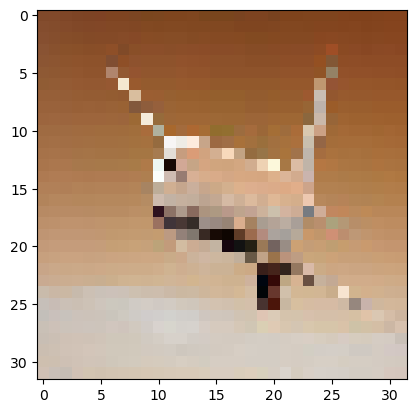

In [130]:
 resize = tf.image.resize(img, (32,32))
# plt.imshow(img)
img_res = plt.imshow(resize.numpy().astype(int))
plt.show()

In [125]:
#load the sample image using the python PIL library and resize the image
# to a 32 by 32 dimension
img = Image.open('/Users/alexanderirabor/Downloads/MachineLearning/ImageClassifier/test/ai_images.jpg')
img = img.resize((32, 32))

In [126]:
# Convert the image to a numpy array and normalize it
# randomImg = np.array(img).astype('float32') / 255

In [127]:
# Convert the image to a numpy array and normalize it
x = np.array(img).astype('float32') / 255

In [118]:
# let's take a look at our numpy array created from the image
x

array([[[0.16862746, 0.2901961 , 0.5058824 ],
        [0.16862746, 0.28627452, 0.5058824 ],
        [0.15686275, 0.2784314 , 0.5019608 ],
        ...,
        [0.10980392, 0.25882354, 0.5058824 ],
        [0.10980392, 0.25882354, 0.5137255 ],
        [0.10980392, 0.25882354, 0.5137255 ]],

       [[0.18039216, 0.3019608 , 0.5137255 ],
        [0.1764706 , 0.29803923, 0.5176471 ],
        [0.16470589, 0.2901961 , 0.5137255 ],
        ...,
        [0.11764706, 0.26666668, 0.5137255 ],
        [0.11764706, 0.26666668, 0.52156866],
        [0.11764706, 0.26666668, 0.52156866]],

       [[0.1882353 , 0.30980393, 0.5254902 ],
        [0.18039216, 0.30980393, 0.5254902 ],
        [0.16470589, 0.30588236, 0.52156866],
        ...,
        [0.12941177, 0.2784314 , 0.5254902 ],
        [0.1254902 , 0.27450982, 0.5294118 ],
        [0.1254902 , 0.27450982, 0.5294118 ]],

       ...,

       [[0.69411767, 0.74509805, 0.8       ],
        [0.7019608 , 0.7529412 , 0.80784315],
        [0.7137255 , 0

In [119]:
# pic_arr = np.asarray(img_res)

In [120]:
# Make a prediction on the new image
y_pred = cnn.predict(np.array([x]))

1/1 [==============================] - 0s 31ms/step


In [121]:
class_index = np.argmax(y_pred)

In [122]:
# Print the predicted class label
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [123]:
class_label = class_names[class_index]

In [109]:
print("Predicted class label:", class_label)

Predicted class label: airplane


In [101]:
# pic_arr

In [102]:
# Make a prediction on the new image
# y_pred = cnn.predict(np.array([x]))
# class_index = np.argmax(y_pred)